# Getting information out of PrimAITE

© Crown-owned copyright 2025, Defence Science and Technology Laboratory UK


In [1]:
!primaite setup

2025-03-24 09:51:57,909: Performing the PrimAITE first-time setup...
2025-03-24 09:51:57,909: Building the PrimAITE app directories...
2025-03-24 09:51:57,909: Building primaite_config.yaml...
2025-03-24 09:51:57,909: Rebuilding the demo notebooks...


2025-03-24 09:51:57,932: Rebuilding the example notebooks...
2025-03-24 09:51:57,934: PrimAITE setup complete!


In [2]:
# Imports
import yaml
from primaite import PRIMAITE_CONFIG
from primaite.config.load import data_manipulation_config_path
from primaite.session.environment import PrimaiteGymEnv
from primaite.simulator.network.hardware.nodes.host.computer import Computer
from notebook.services.config import ConfigManager

cm = ConfigManager().update('notebook', {'limit_output': 50})  # limit output lines to 50 - for neatness

# create the env
with open(data_manipulation_config_path(), 'r') as f:
    cfg = yaml.safe_load(f)

env = PrimaiteGymEnv(env_config=cfg)

2025-03-24 09:52:01,493: PrimaiteGymEnv RNG seed = None


This notebook opts to use the [data manipulation scenario](./Data-Manipulation-E2E-Demonstration.ipynb) (also known as UC2) network configuration but all of the methods demonstrated are config agnostic and can be used in any PrimAITE scenario.

## Visualising the Simulation Network

Some of the simpler networks can be visualised by using the `.draw()` method as show in the code snippet below. 

Larger networks will still render but users may prefer to create their own network diagrams via other tooling as shown in the [UC7 notebooks](./UC7-E2E-Demo.ipynb)

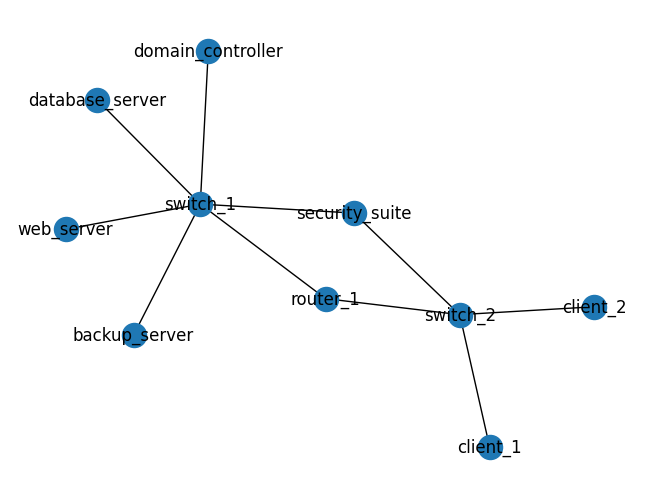

In [3]:
env.game.simulation.network.draw()

## Getting the state of a simulation object

The state of the simulation object is used to determine the observation space used by agents.

Any object created using the ``SimComponent`` class has a ``describe_state`` method which can show the state of the object.

An example of such an object is ``Computer`` which inherits from ``SimComponent``. As this notebook utilises the [UC2 network configuration]((./Data-Manipulation-E2E-Demonstration.ipynb)) we can initialise the **client_1** node and confirm that it's a ``Computer`` object.

In [4]:
client_1: Computer = env.game.simulation.network.get_node_by_hostname("client_1")
client_1.describe_state()

{'uuid': '5a340259-a117-409c-9d6e-2370cdc0abd2',
 'hostname': 'client_1',
 'operating_state': 1,
 'NICs': {1: {'uuid': '596abd87-881f-4a54-b5d2-fc0ba6f1baad',
   'mac_address': 'ef:eb:dc:f5:a3:86',
   'speed': 100.0,
   'mtu': 1500,
   'enabled': True,
   'nmne': {},
   'traffic': {'udp': {219: {'inbound': 0.00626373291015625,
      'outbound': 0.00565338134765625}}},
   'ip_address': '192.168.10.21',
   'subnet_mask': '255.255.255.0',
   'wake_on_lan': False}},
 'file_system': {'uuid': 'c7d60797-cc2e-4bf5-a304-00c4e002e3ad',
  'folders': {'root': {'uuid': 'a4e4cf7e-ed00-4b1c-bc14-09ed52677d59',
    'name': 'root',
    'health_status': 1,
    'visible_status': 0,
    'previous_hash': None,
    'revealed_to_red': False,
    'files': {},
    'deleted_files': {},
    'scanned_this_step': False}},
  'deleted_folders': {},
  'num_file_creations': 0,
  'num_file_deletions': 0},
 'applications': {'web-browser': {'uuid': 'fee7fed9-ea09-4b1d-aa46-bd4f4942390c',
   'health_state_actual': 1,
   '

### More specific describe_state

As you can see, the output from the ``describe_state`` method for the ``Computer`` object includes the describe state for all its component which causes a rather large output.

As stated, the ``describe_state`` can be called on any object that inherits ``SimComponent``. Meaning, we can narrow down our output by retrieving the state of a specific item. The code snippet below calls the `describe_state` method on **client_1**'s filesystem.

In [5]:
client_1.file_system.describe_state()

{'uuid': 'c7d60797-cc2e-4bf5-a304-00c4e002e3ad',
 'folders': {'root': {'uuid': 'a4e4cf7e-ed00-4b1c-bc14-09ed52677d59',
   'name': 'root',
   'health_status': 1,
   'visible_status': 0,
   'previous_hash': None,
   'revealed_to_red': False,
   'files': {},
   'deleted_files': {},
   'scanned_this_step': False}},
 'deleted_folders': {},
 'num_file_creations': 0,
 'num_file_deletions': 0}

It's worth reiterating that the `describe_state()` method can be used on literally any object that inherits from ``SimComponent``. For example, even the system default **'admin'** user inherits ``.describe_state()``:

In [6]:
client_1.user_manager.admins.get("admin").describe_state()

{'uuid': 'ead41b0f-e1c6-4e8b-9908-d346ae4d3734',
 'username': 'admin',
 'password': 'admin',
 'disabled': False,
 'is_admin': True,
 'num_of_logins': 0}

## System Logs 

Objects that inherit from the ``Node`` class will inherit the ``sys_log`` attribute.

This is to simulate the idea that items such as Computer, Routers, Servers, etc. have a logging system used to diagnose problems.

Enabling this functionality will slow down training time due to the amount of sheer amount of logs created therefore it's recommended to disable these logs when training/evaluating agents.

In [7]:
# store config
# this is to prevent the notebook from breaking your local settings
was_enabled = PRIMAITE_CONFIG["developer_mode"]["enabled"]
was_syslogs_enabled = PRIMAITE_CONFIG["developer_mode"]["output_sys_logs"]

# enable dev mode so that the default config outputs are overridden for this demo
PRIMAITE_CONFIG["developer_mode"]["enabled"] = True
PRIMAITE_CONFIG["developer_mode"]["output_sys_logs"] = True

# Remake the environment
env = PrimaiteGymEnv(env_config=cfg)

# get the example computer
client_1: Computer = env.game.simulation.network.get_node_by_hostname("client_1")

# show sys logs on terminal
client_1.sys_log.show()

# restore config
PRIMAITE_CONFIG["developer_mode"]["enabled"] = was_enabled
PRIMAITE_CONFIG["developer_mode"]["output_sys_logs"] = was_syslogs_enabled

2025-03-24 09:52:01,828: PrimaiteGymEnv RNG seed = None


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                         client_1 Sys Log                                                                        |
+-------------------------+---------+-----------------------------------------------------------------------------------------------------------------------------+
| Timestamp               | Level   | Message                                                                                                                     |
+-------------------------+---------+-----------------------------------------------------------------------------------------------------------------------------+
| 2025-03-24 09:52:01,803 | INFO    | Running Application database-client                                                                                         |
| 2025-03-24 09:

## Viewing Agent history

It's possible to view the actions carried out by an agent for a given training session using the `show_history()` method. By default, this will be all actions apart from DONOTHING actions.

In [8]:
with open(data_manipulation_config_path(), 'r') as f:
    cfg = yaml.safe_load(f)

env = PrimaiteGymEnv(env_config=cfg)

# Run the training session to generate some resultant data.
for i in range(100):
    env.step(0)

2025-03-24 09:52:01,951: PrimaiteGymEnv RNG seed = None


Calling `.show_history()` should show us when the Data Manipulation used the `NODE_APPLICATION_EXECUTE` action.

In [9]:
attacker = env.game.agents["data_manipulation_attacker"]

attacker.show_history()

Actions for 'data_manipulation_attacker':
+------+--------------------------+-----------------------------------------+----------+---------------+
| Step |          Action          |                  Params                 | Response | Response Data |
+------+--------------------------+-----------------------------------------+----------+---------------+
|  25  | node-application-execute |           node_name: client_1           | success  |               |
|      |                          | application_name: data-manipulation-bot |          |               |
|      |                          |                                         |          |               |
|  40  | node-application-execute |           node_name: client_1           | success  |               |
|      |                          | application_name: data-manipulation-bot |          |               |
|      |                          |                                         |          |               |
|  58  | node